In [1]:
import numpy as np
import h5py
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

## Load files

In [3]:
# Load CSV files into pandas DataFrames
data_files = {
    "kyle": {
        "jumping": {
            "hand": "data/jumping/kjh_data.csv",
            "front": "data/jumping/kjf_data.csv",
            "back": "data/jumping/kjb_data.csv",
        },
        "walking": {
            "hand": "data/walking/kwh_data.csv",
            "front": "data/walking/kwf_data.csv",
            "back": "data/walking/kwb_data.csv",
        },
    },
    "abdellah": {
        "jumping": {
            "backright": "data/jumping/ajbrp_data.csv",
            "frontleft": "data/jumping/ajflp_data.csv",
        },
        "walking": {
            "backright": "data/walking/awbrp_data.csv",
            "frontleft": "data/walking/awflp_data.csv",
        },
    },
    "liam": {
        "jumping": {
            "backleft": "data/jumping/ljlbp_data.csv",
            "backright": "data/jumping/ljbrp_data.csv",
        },
        "walking": {
            "lefthand": "data/walking/lwlh_data.csv",
            "leftpocket": "data/walking/lwlp_data.csv",
            "righthand": "data/walking/lwrh_data.csv",
            "rightpocket": "data/walking/lwrp_data.csv",
        },
    },
}

# Save DataFrames to HDF5 file
with h5py.File("activityData.hdf5", "w") as hdf5_file:
    for person, activities in data_files.items():
        for activity, areas in activities.items():
            for area, file_path in areas.items():
                df = pd.read_csv(file_path)
                hdf5_file.create_dataset(f"{person}/{activity}/{area}", data=df.to_numpy())
    

In [4]:
features = ["Time (s)", "Linear Acceleration x (m/s^2)", "Linear Acceleration y (m/s^2)", "Linear Acceleration z (m/s^2)", "Absolute acceleration (m/s^2)"]

def preprocess_data(hdf5_file):
    data_frames = {
        "walking": [],
        "jumping": []
    }

    for person in hdf5_file.keys():
        for activity in hdf5_file[person].keys():
            activity_data = []
            
            for area in hdf5_file[person][activity].keys():
                dataset = hdf5_file[person][activity][area]
                df = pd.DataFrame(dataset, columns=features)

                # Remove first 5 seconds and last 5 seconds of data
                start_time = df["Time (s)"].min()
                end_time = df["Time (s)"].max()
                df = df[(df["Time (s)"] > start_time + 5) & (df["Time (s)"] < end_time - 5)]

                activity_data.append(df)

            # Concatenate all DataFrames related to the same activity for all persons
            data_frames[activity].append(pd.concat(activity_data, ignore_index=True))

    # Concatenate all DataFrames for each activity
    for activity in data_frames.keys():
        data_frames[activity] = pd.concat(data_frames[activity], ignore_index=True)

    return data_frames

In [5]:
features = ["Time (s)", "Linear Acceleration x (m/s^2)", "Linear Acceleration y (m/s^2)", "Linear Acceleration z (m/s^2)", "Absolute acceleration (m/s^2)"]

def preprocessed_data(hdf5_file):
    data_frames = {}

    for person in hdf5_file.keys():
        data_frames[person] = {}
        
        for activity in hdf5_file[person].keys():
            activity_data = []
            
            for area in hdf5_file[person][activity].keys():
                dataset = hdf5_file[person][activity][area]
                df = pd.DataFrame(dataset, columns=features)

                # Remove first 5 seconds and last 5 seconds of data
                start_time = df["Time (s)"].min()
                end_time = df["Time (s)"].max()
                df = df[(df["Time (s)"] > start_time + 5) & (df["Time (s)"] < end_time - 5)]

                activity_data.append(df)

            # Concatenate all DataFrames related to the same activity for the same person
            data_frames[person][activity] = pd.concat(activity_data, ignore_index=True)

    return data_frames

In [6]:
with h5py.File("activityData.hdf5", "r") as hdf5_file:
    preprocessed_data1 = preprocessed_data(hdf5_file)

In [7]:
def plot_acceleration_data1(preprocessed_data, person, activity):
    df = preprocessed_data[person][activity]
    
    fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
    
    axes[0].plot(df["Time (s)"], df["Linear Acceleration x (m/s^2)"], label="x-axis", color='red')
    axes[0].set_title(f"{activity.capitalize()} Activity for {person.capitalize()} (X-axis)")
    axes[0].set_ylabel("Acceleration (m/s^2)")
    axes[0].legend()

    axes[1].plot(df["Time (s)"], df["Linear Acceleration y (m/s^2)"], label="y-axis", color='blue')
    axes[1].set_title(f"{activity.capitalize()} Activity for {person.capitalize()} (Y-axis)")
    axes[1].set_ylabel("Acceleration (m/s^2)")
    axes[1].legend()

    axes[2].plot(df["Time (s)"], df["Linear Acceleration z (m/s^2)"], label="z-axis", color='green')
    axes[2].set_title(f"{activity.capitalize()} Activity for {person.capitalize()} (Z-axis)")
    axes[2].set_xlabel("Time (s)")
    axes[2].set_ylabel("Acceleration (m/s^2)")
    axes[2].legend()

    plt.tight_layout()
    plt.show()

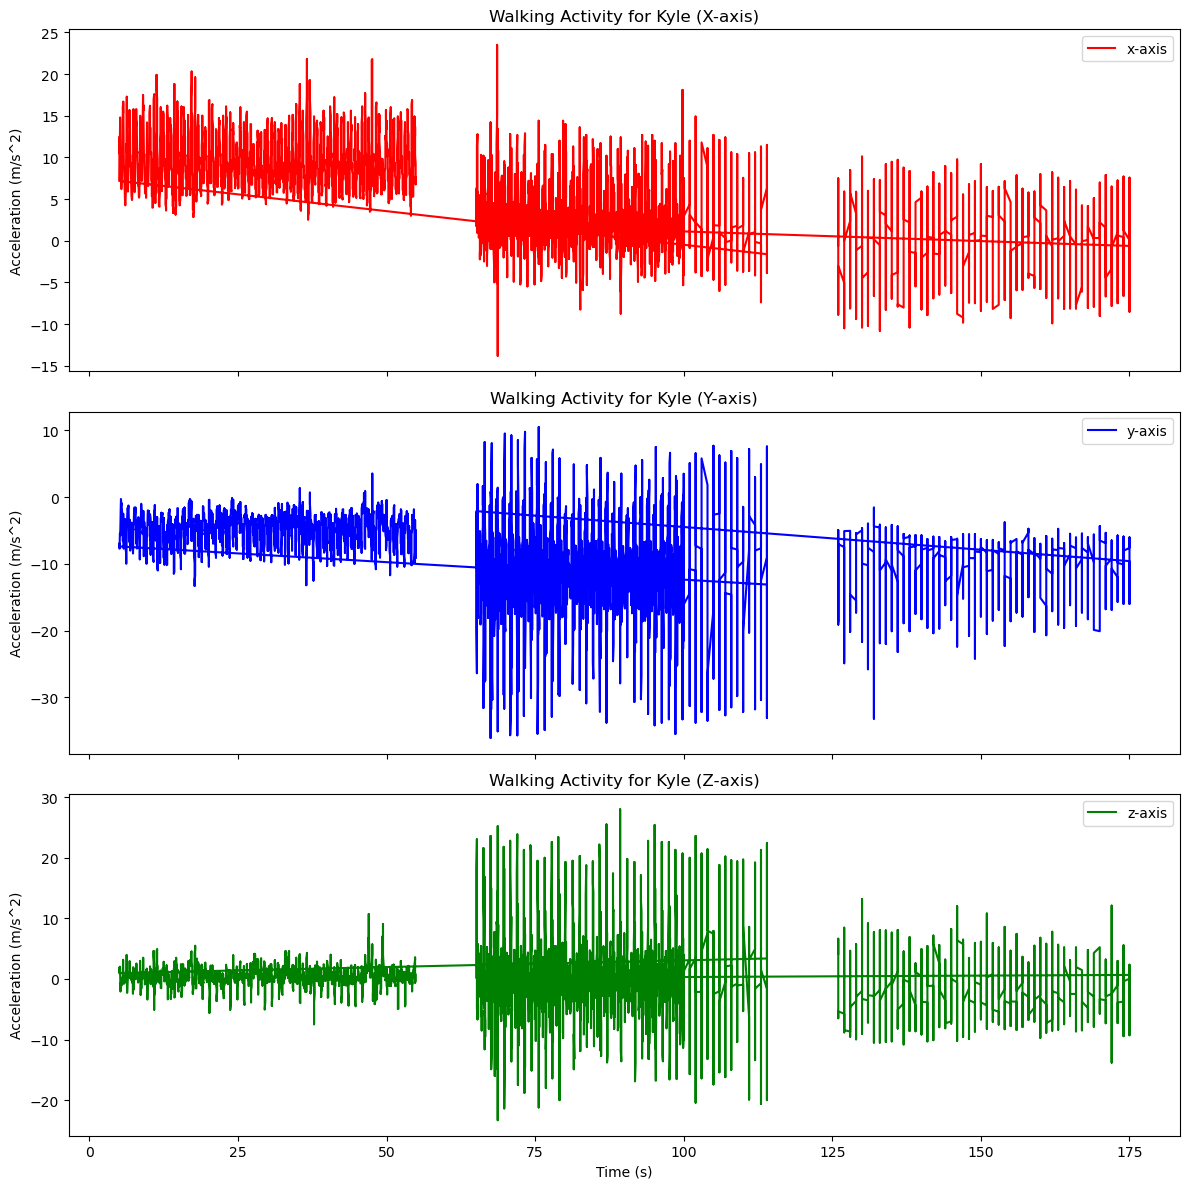

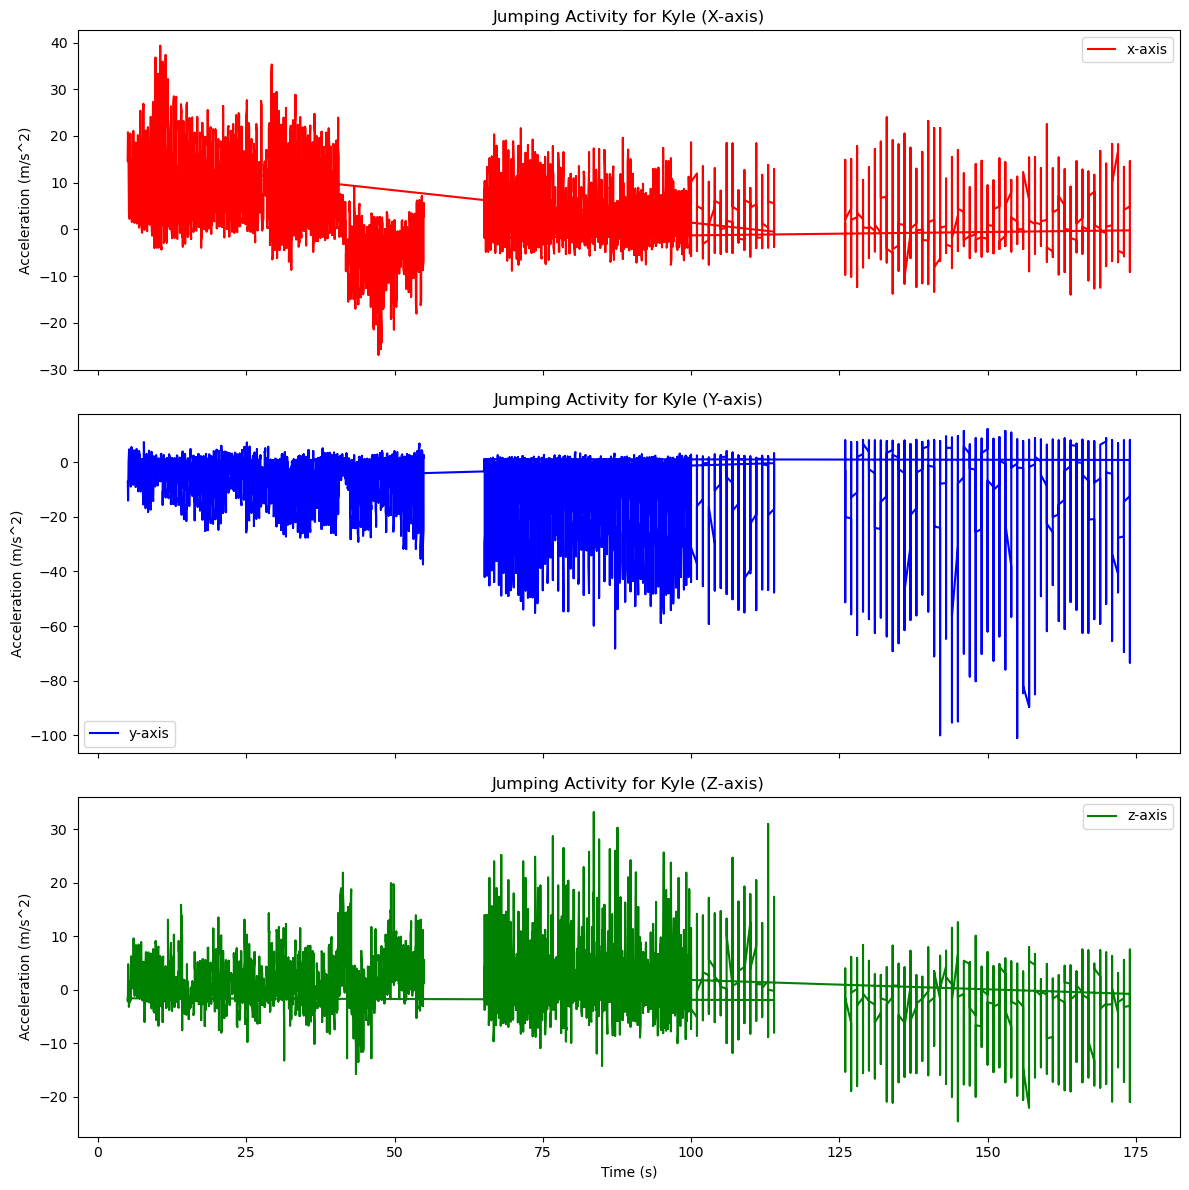

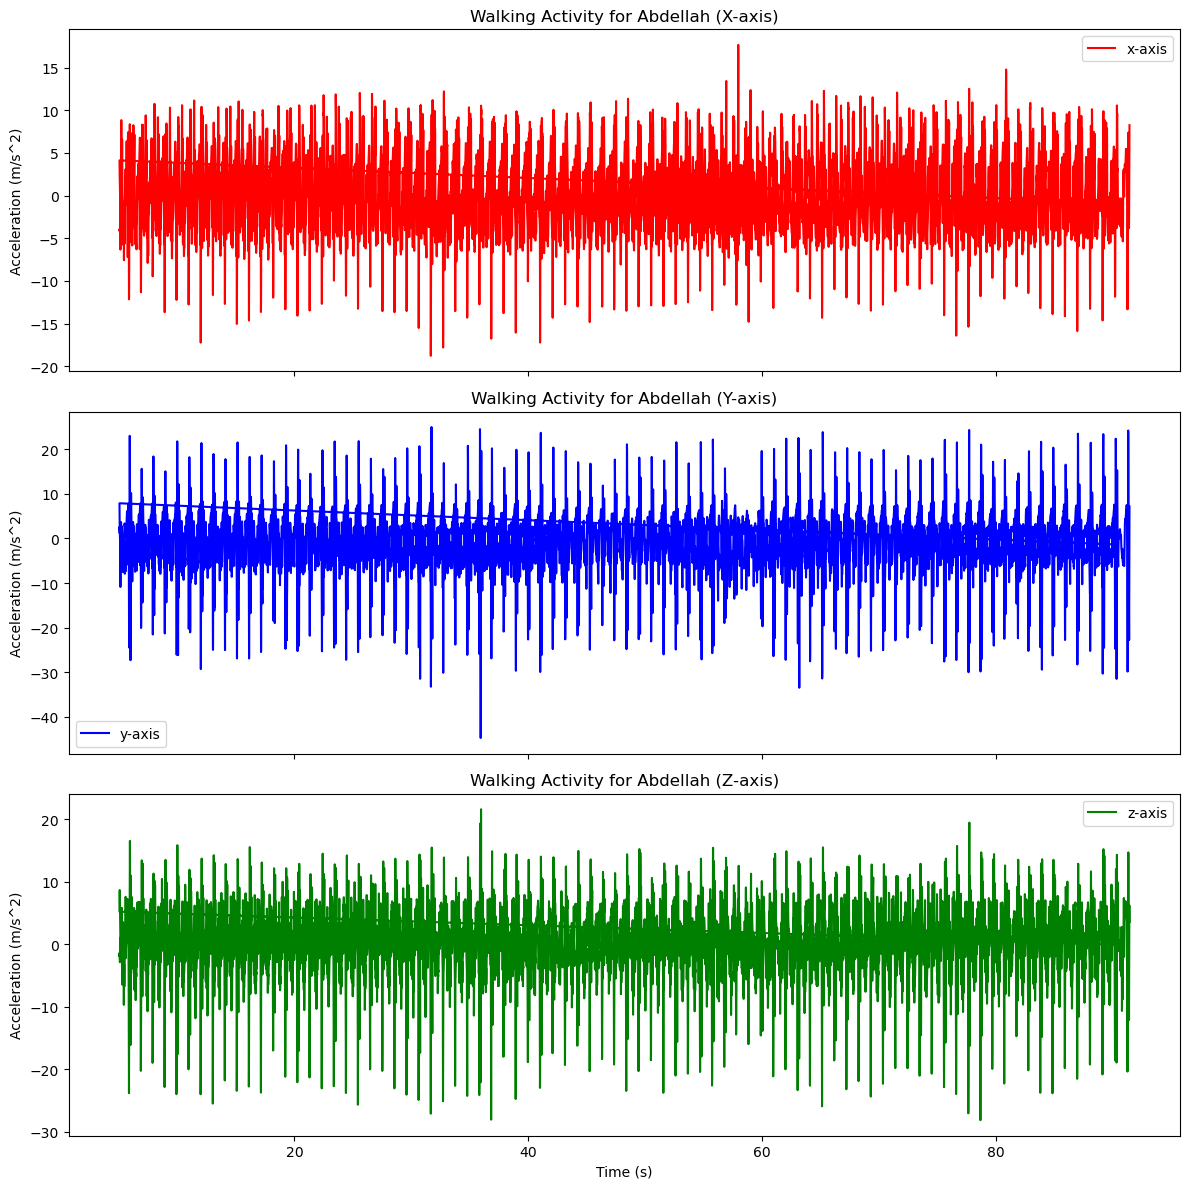

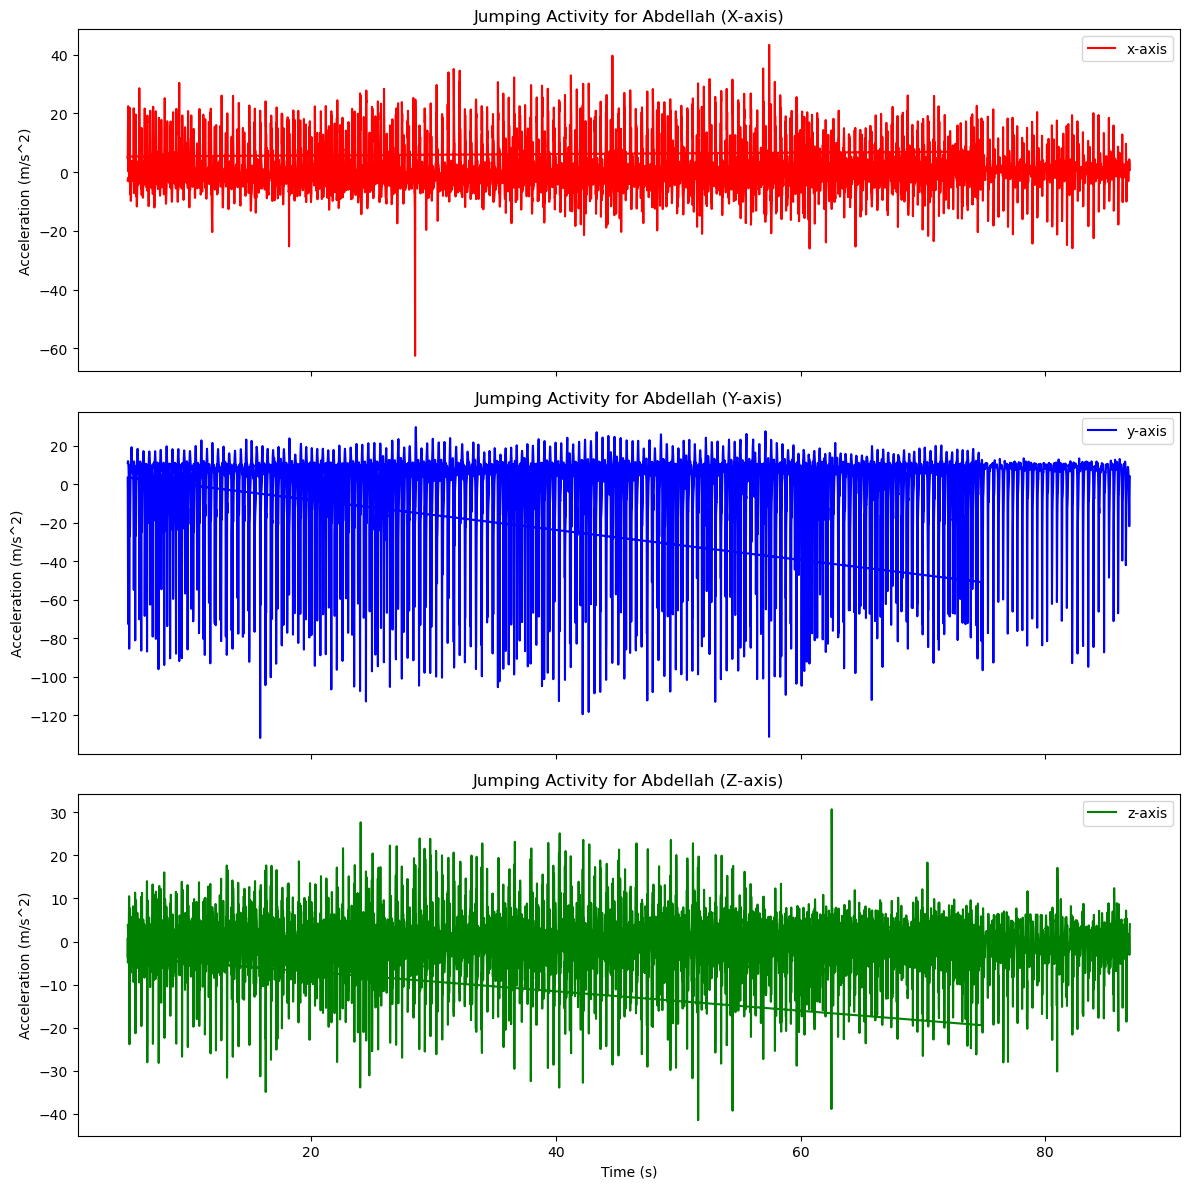

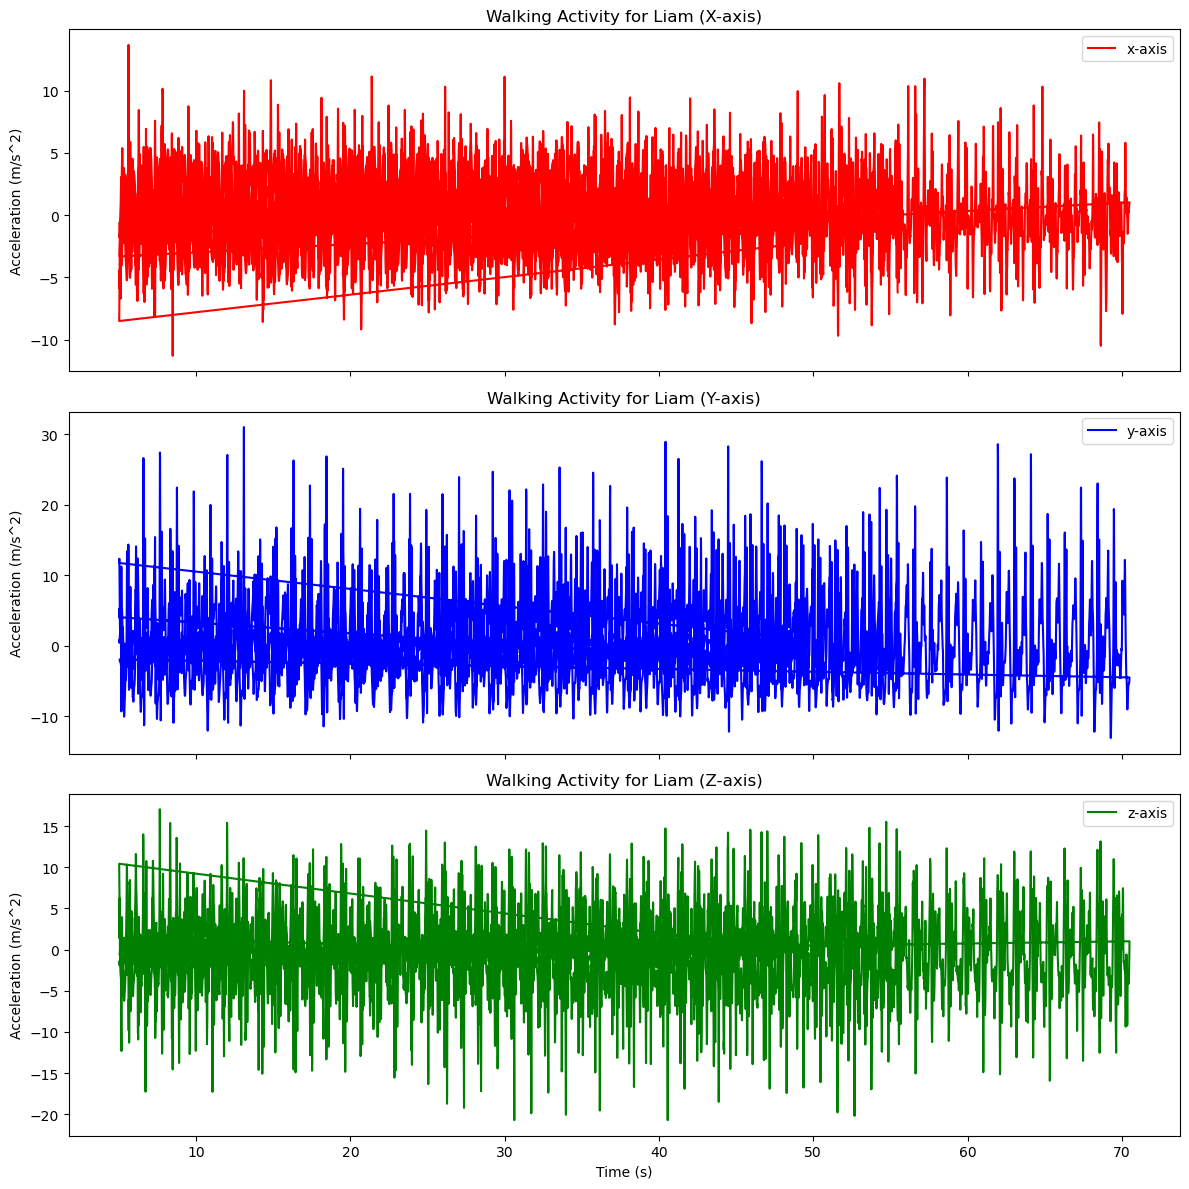

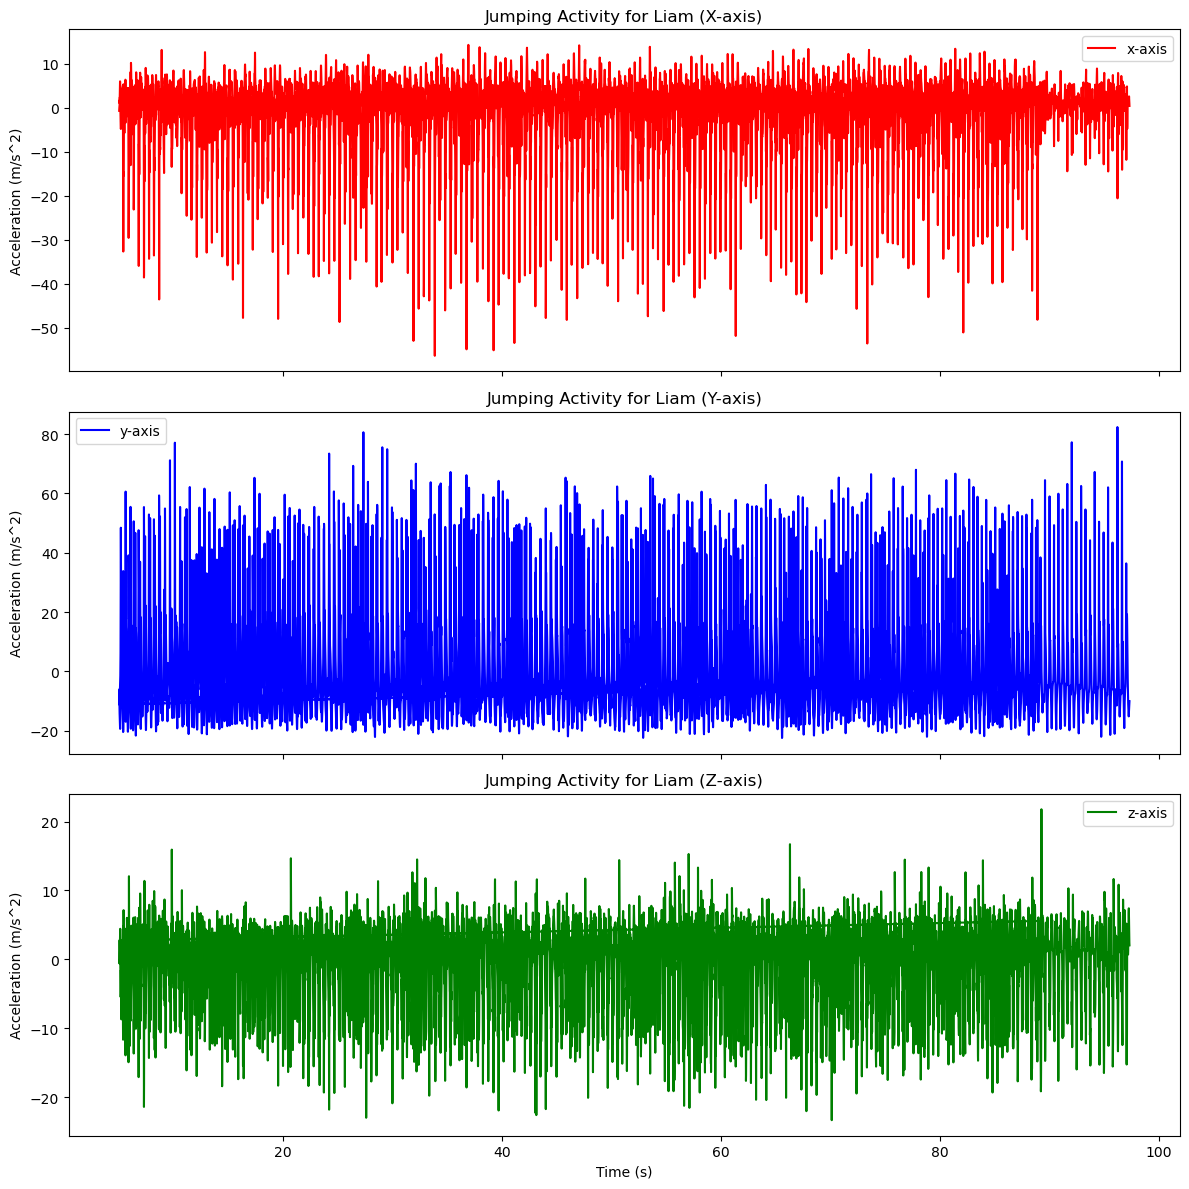

In [8]:
plot_acceleration_data1(preprocessed_data1, "kyle", "walking")
plot_acceleration_data1(preprocessed_data1, "kyle", "jumping")
plot_acceleration_data1(preprocessed_data1, "abdellah", "walking")
plot_acceleration_data1(preprocessed_data1, "abdellah", "jumping")
plot_acceleration_data1(preprocessed_data1, "liam", "walking")
plot_acceleration_data1(preprocessed_data1, "liam", "jumping")

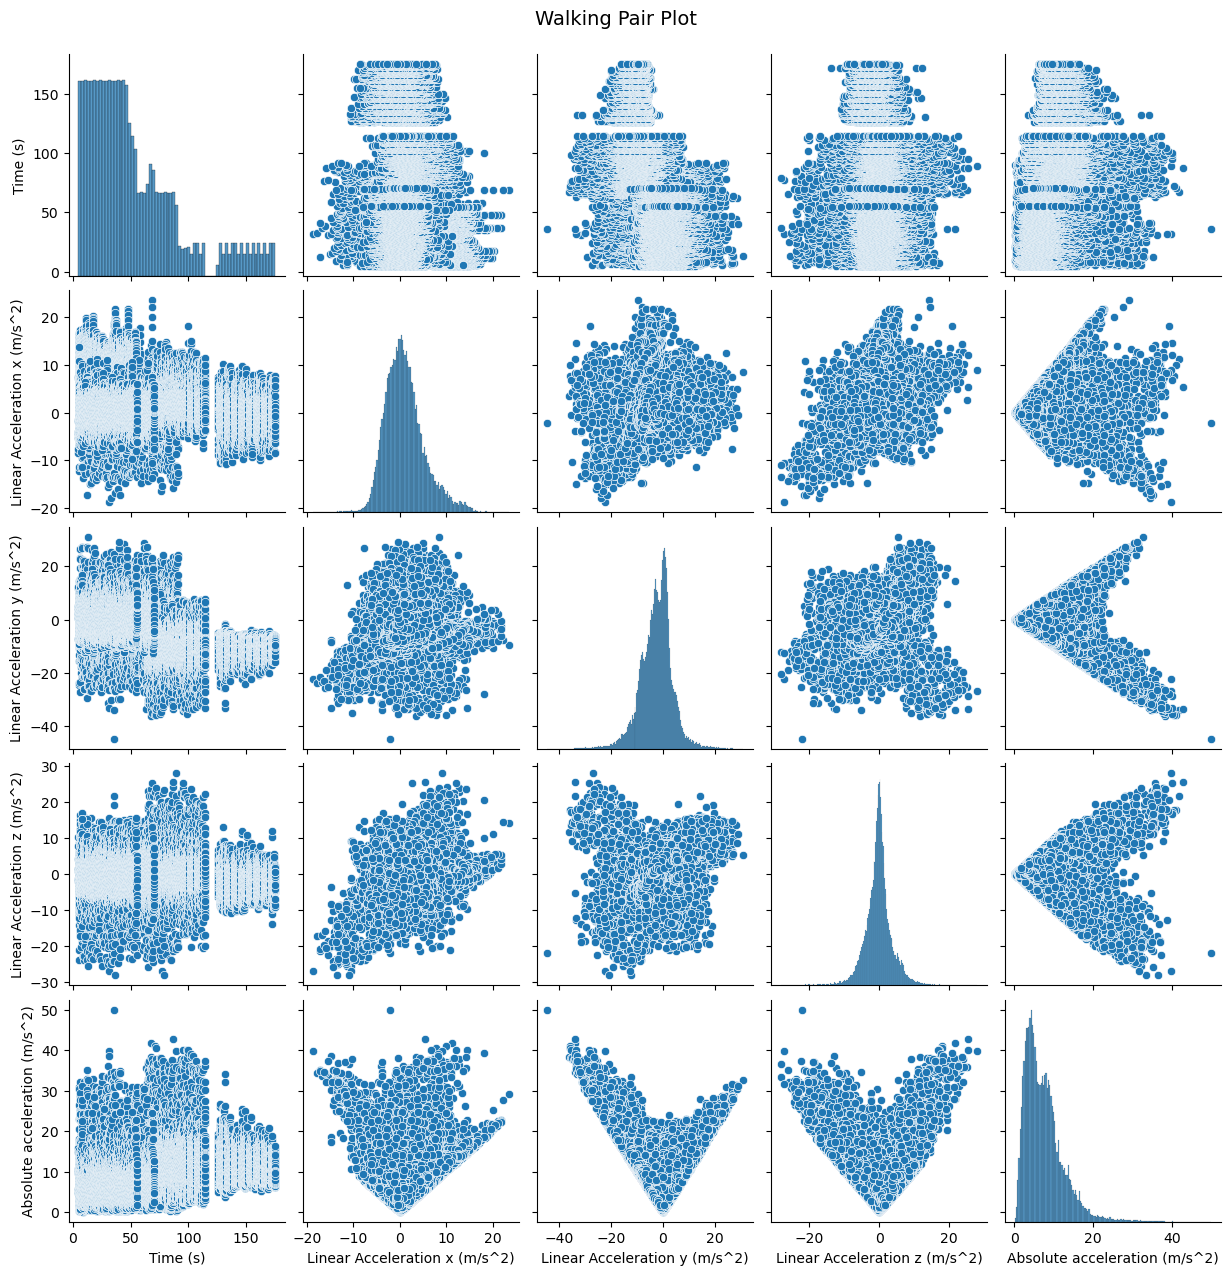

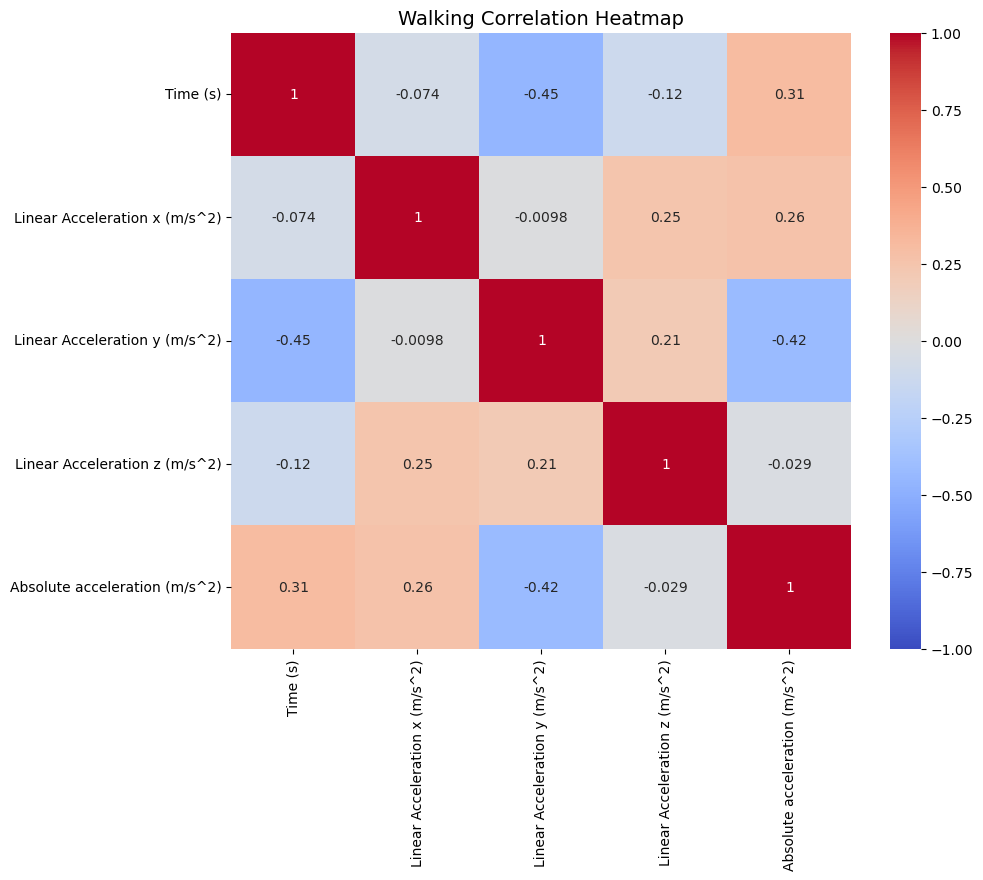

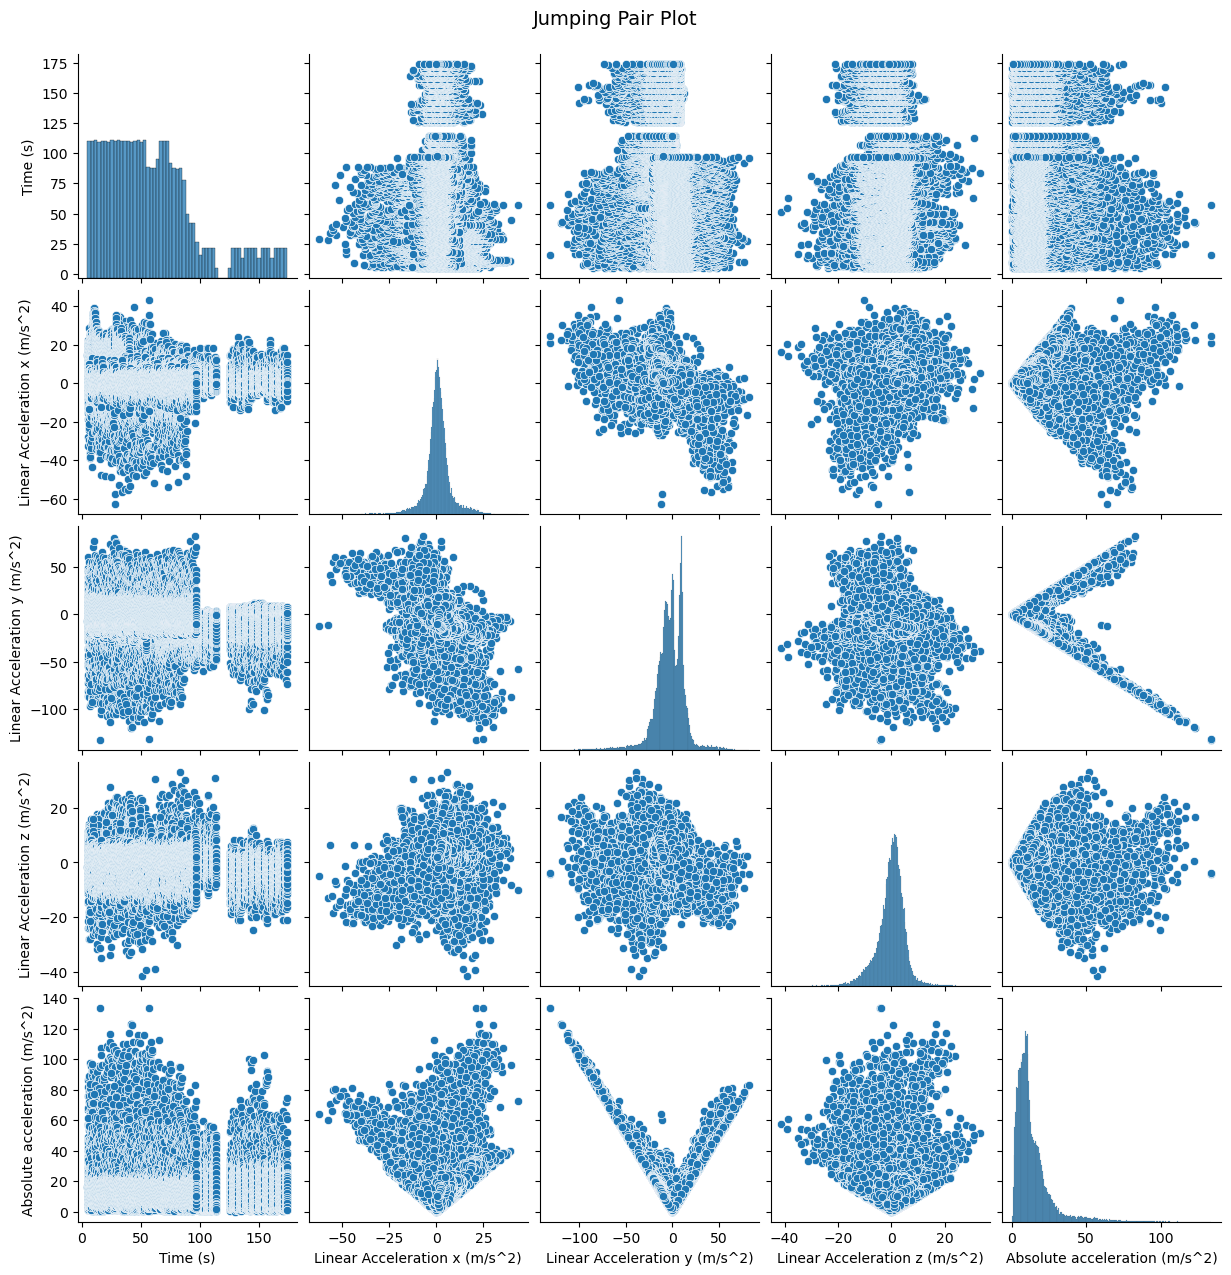

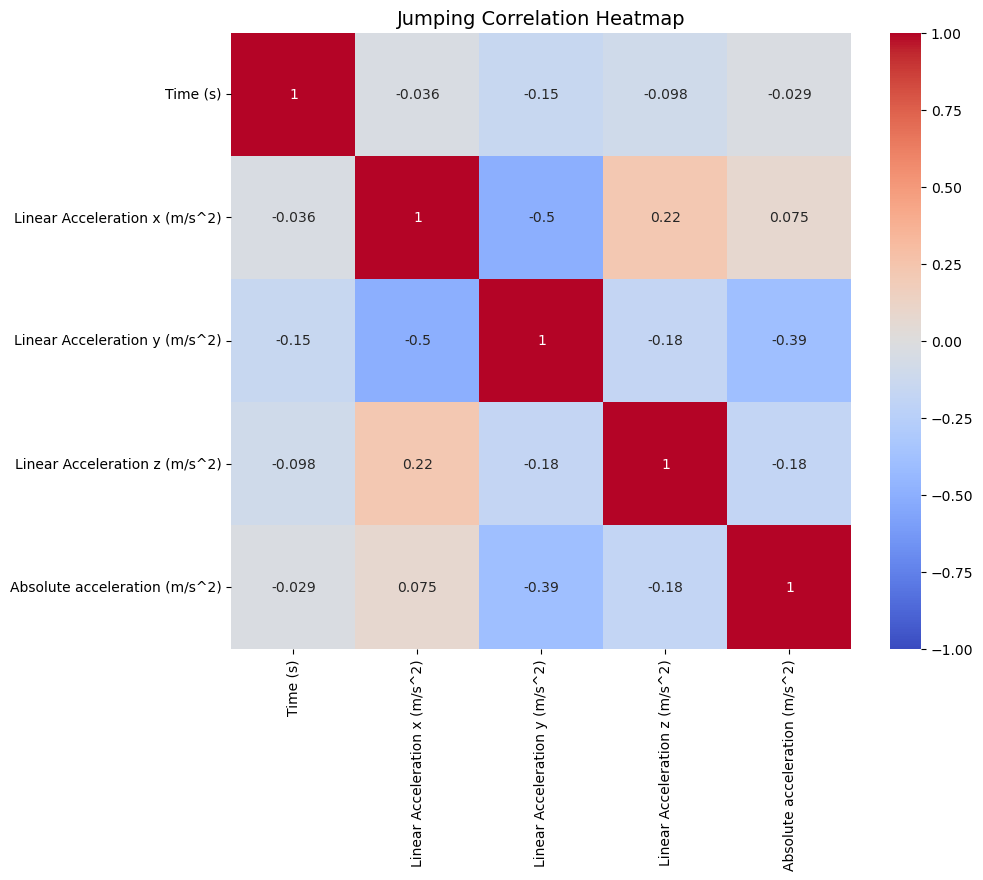

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_data(df, title):
    # Create a pair plot to visualize relationships between features
    sns.pairplot(df)
    plt.suptitle(f'{title} Pair Plot', y=1.02, fontsize=14)
    plt.show()

    # Create a correlation heatmap to visualize correlations between features
    corr = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'{title} Correlation Heatmap', fontsize=14)
    plt.show()

# Visualize walking data
visualize_data(walking_data, "Walking")

# Visualize jumping data
visualize_data(jumping_data, "Jumping")

In [29]:
import matplotlib.ticker as ticker
def plot_acceleration_data2(df, person, activity):
    fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
    
    axes[0].plot(df["Time (s)"], df["Linear Acceleration x (m/s^2)"], label="x-axis", color='red')
    axes[0].set_title(f"{activity.capitalize()} Activity for {person.capitalize()} (X-axis)")
    axes[0].set_ylabel("Acceleration (m/s^2)")
    axes[0].legend()

    axes[1].plot(df["Time (s)"], df["Linear Acceleration y (m/s^2)"], label="y-axis", color='blue')
    axes[1].set_title(f"{activity.capitalize()} Activity for {person.capitalize()} (Y-axis)")
    axes[1].set_ylabel("Acceleration (m/s^2)")
    axes[1].legend()

    axes[2].plot(df["Time (s)"], df["Linear Acceleration z (m/s^2)"], label="z-axis", color='green')
    axes[2].set_title(f"{activity.capitalize()} Activity for {person.capitalize()} (Z-axis)")
    axes[2].set_xlabel("Time (s)")
    axes[2].set_ylabel("Acceleration (m/s^2)")
    axes[2].legend()

    axes[3].plot(df["Time (s)"], df["Absolute acceleration (m/s^2)"], label="Absolute", color='pink')
    axes[3].set_title(f"{activity.capitalize()} Activity for {person.capitalize()} (Absolute Acceleration)")
    axes[3].set_xlabel("Time (s)")
    axes[3].set_ylabel("Acceleration (m/s^2)")
    axes[3].legend()

    plt.tight_layout()
    plt.show()


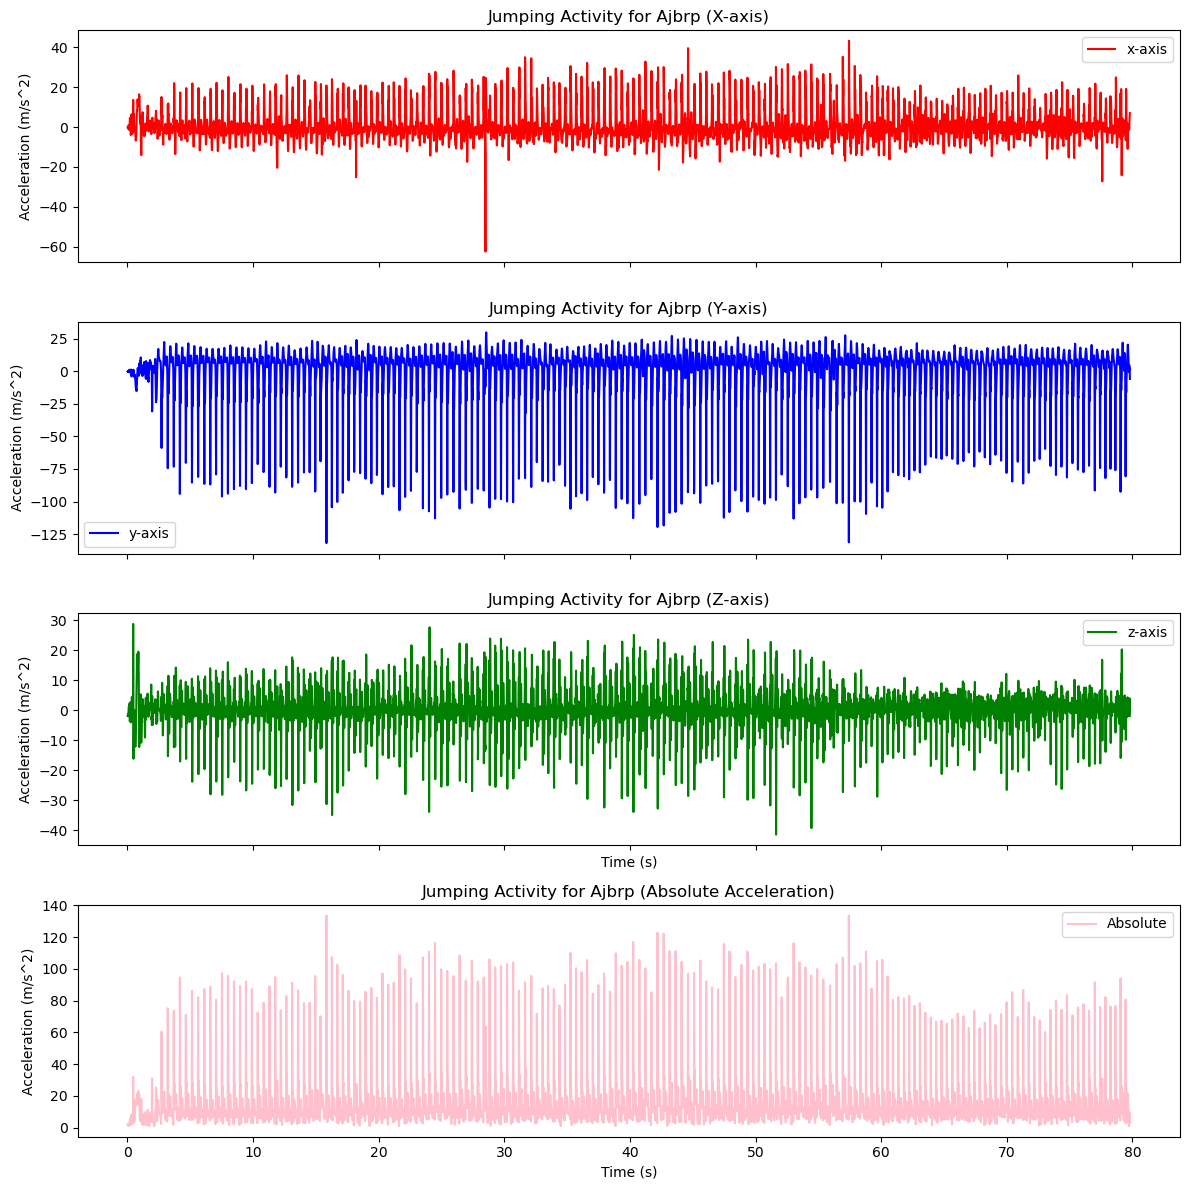

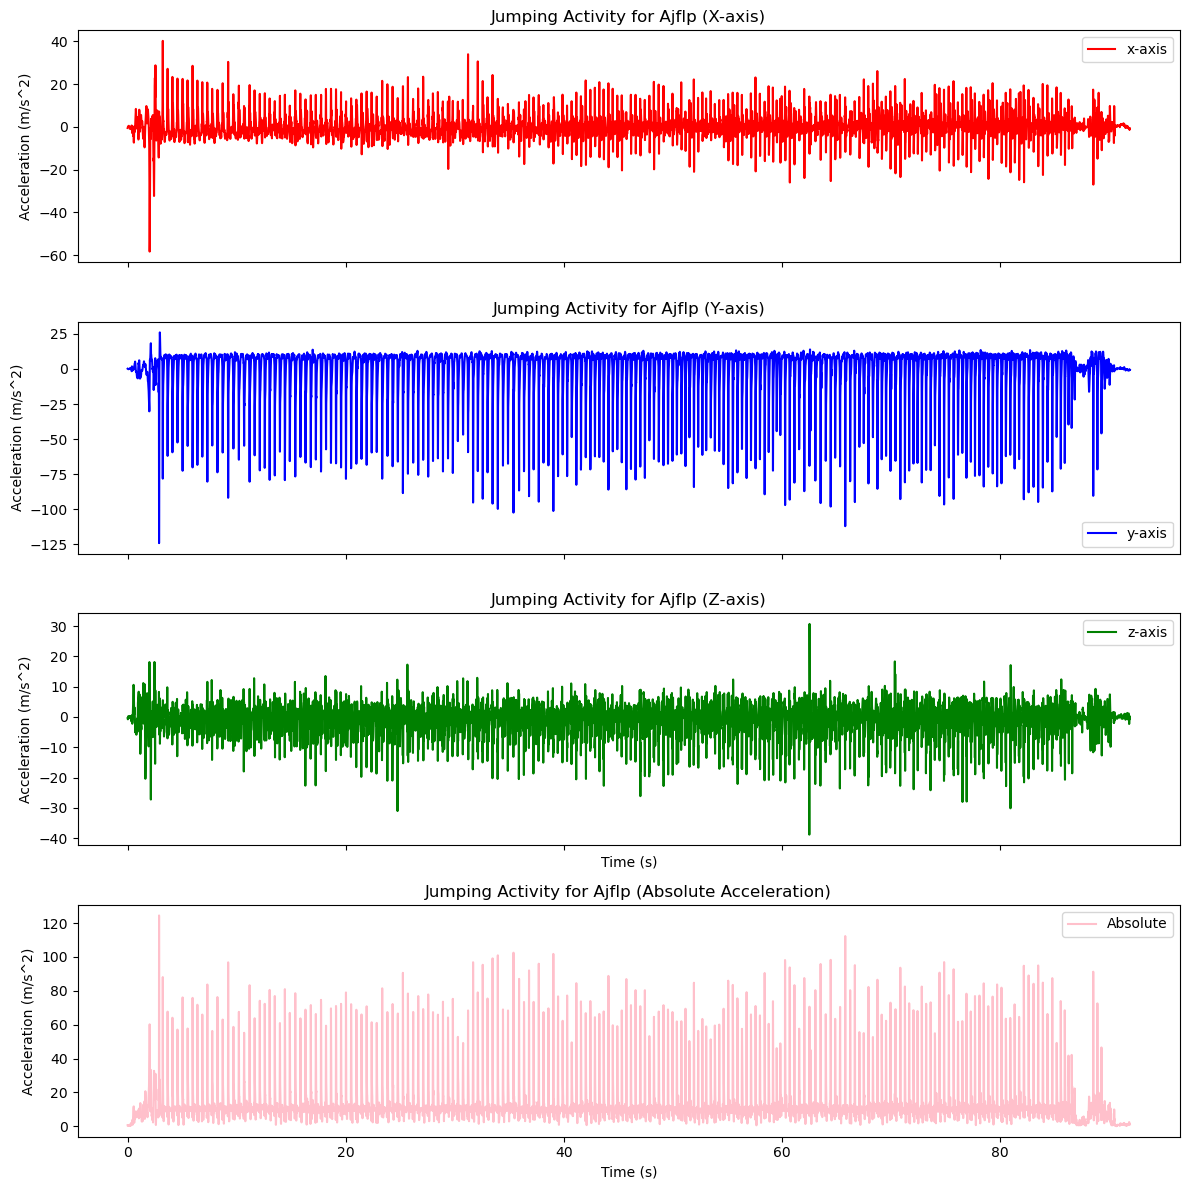

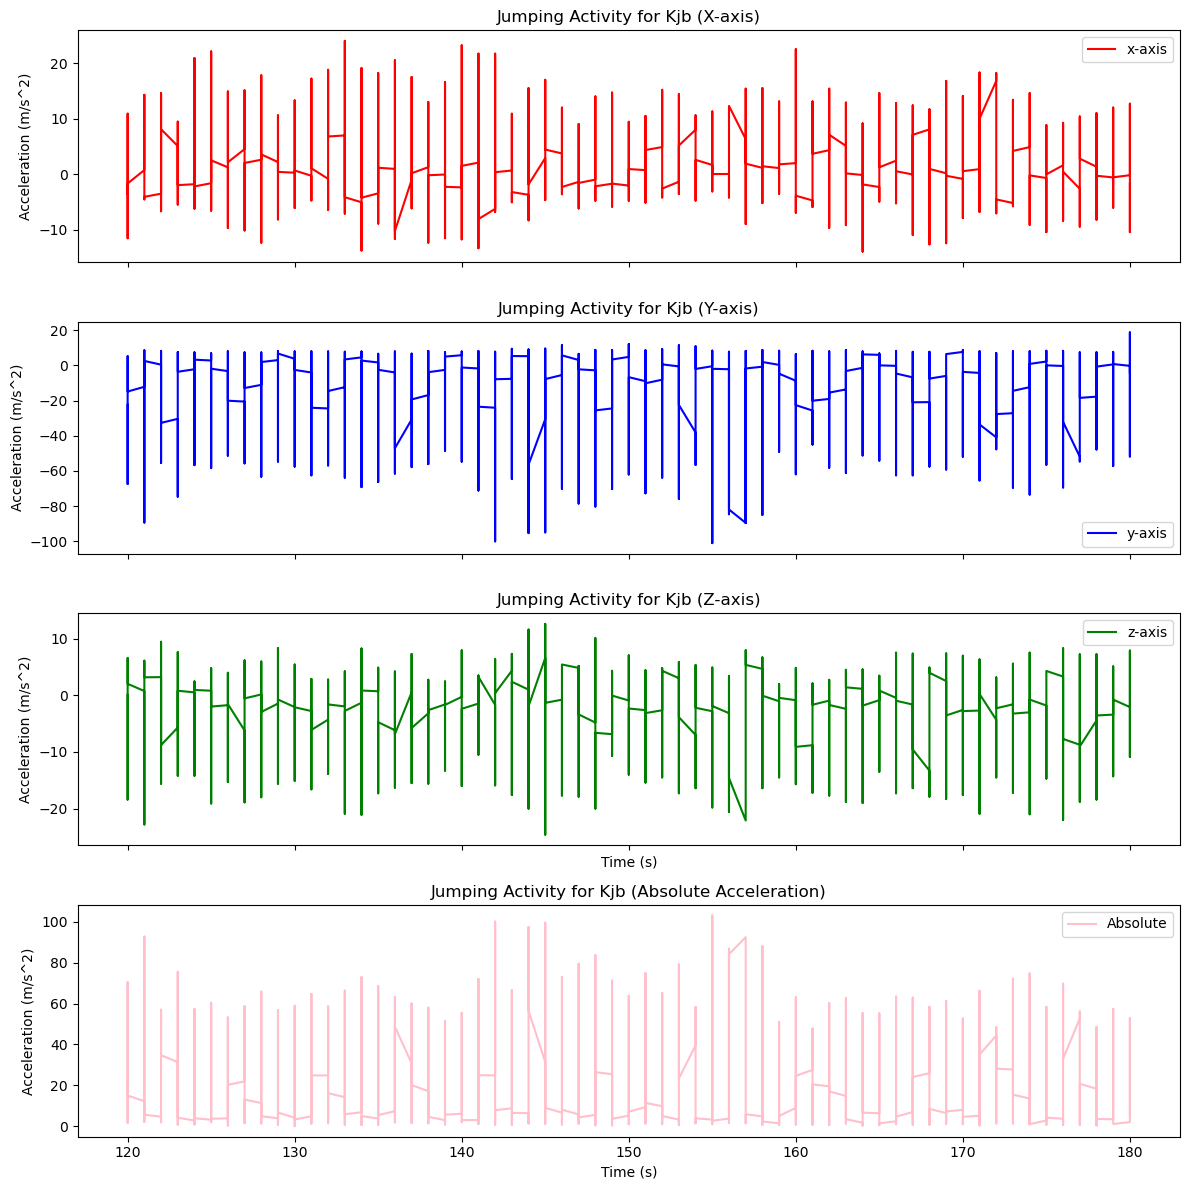

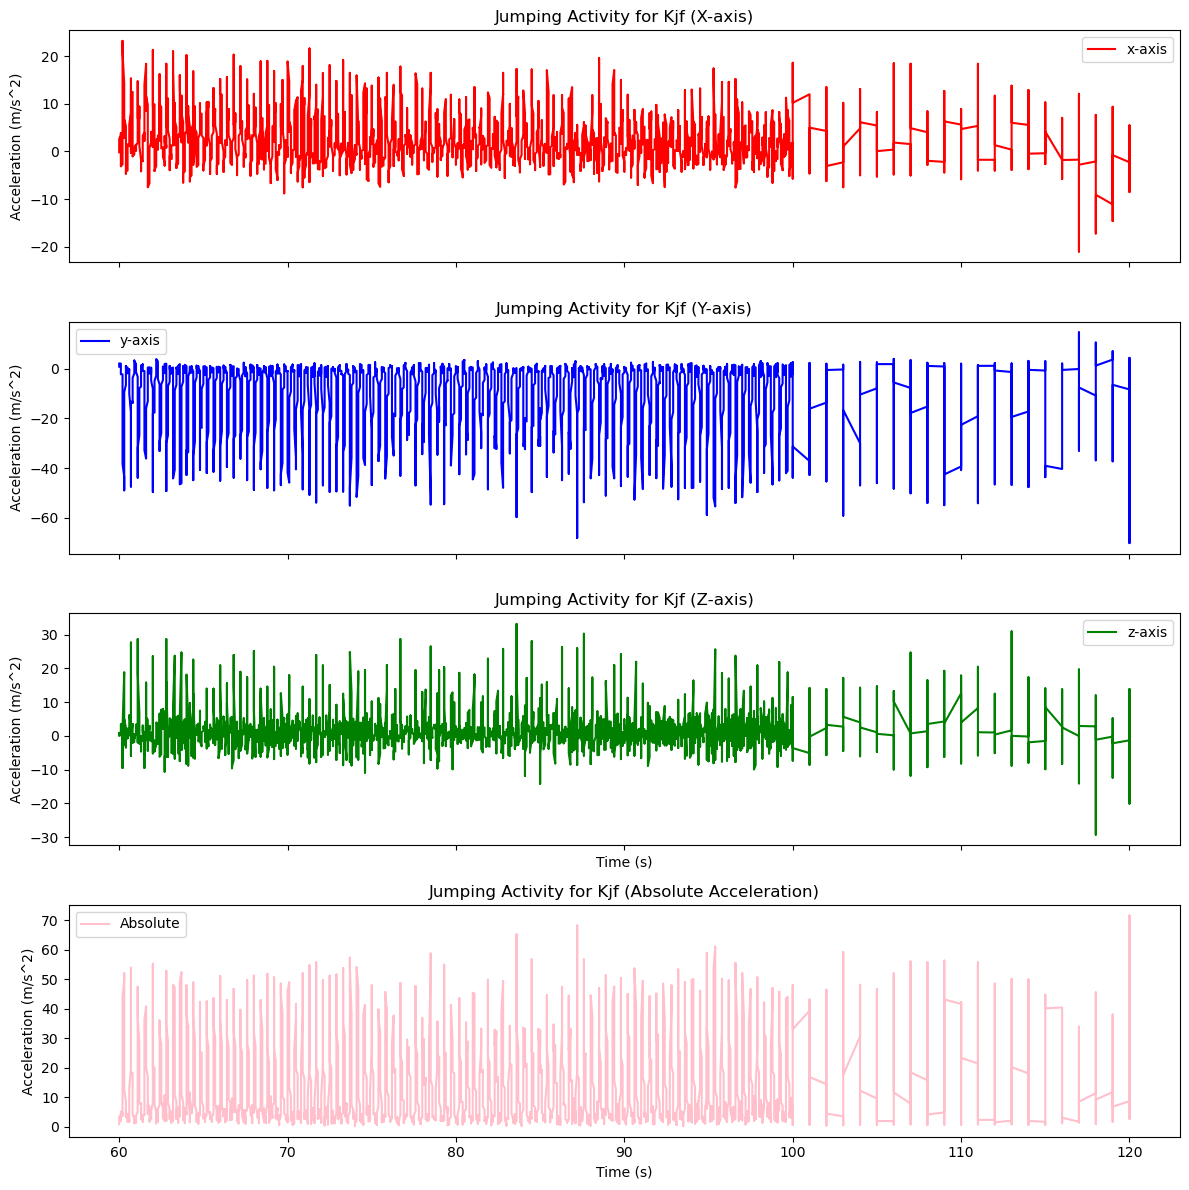

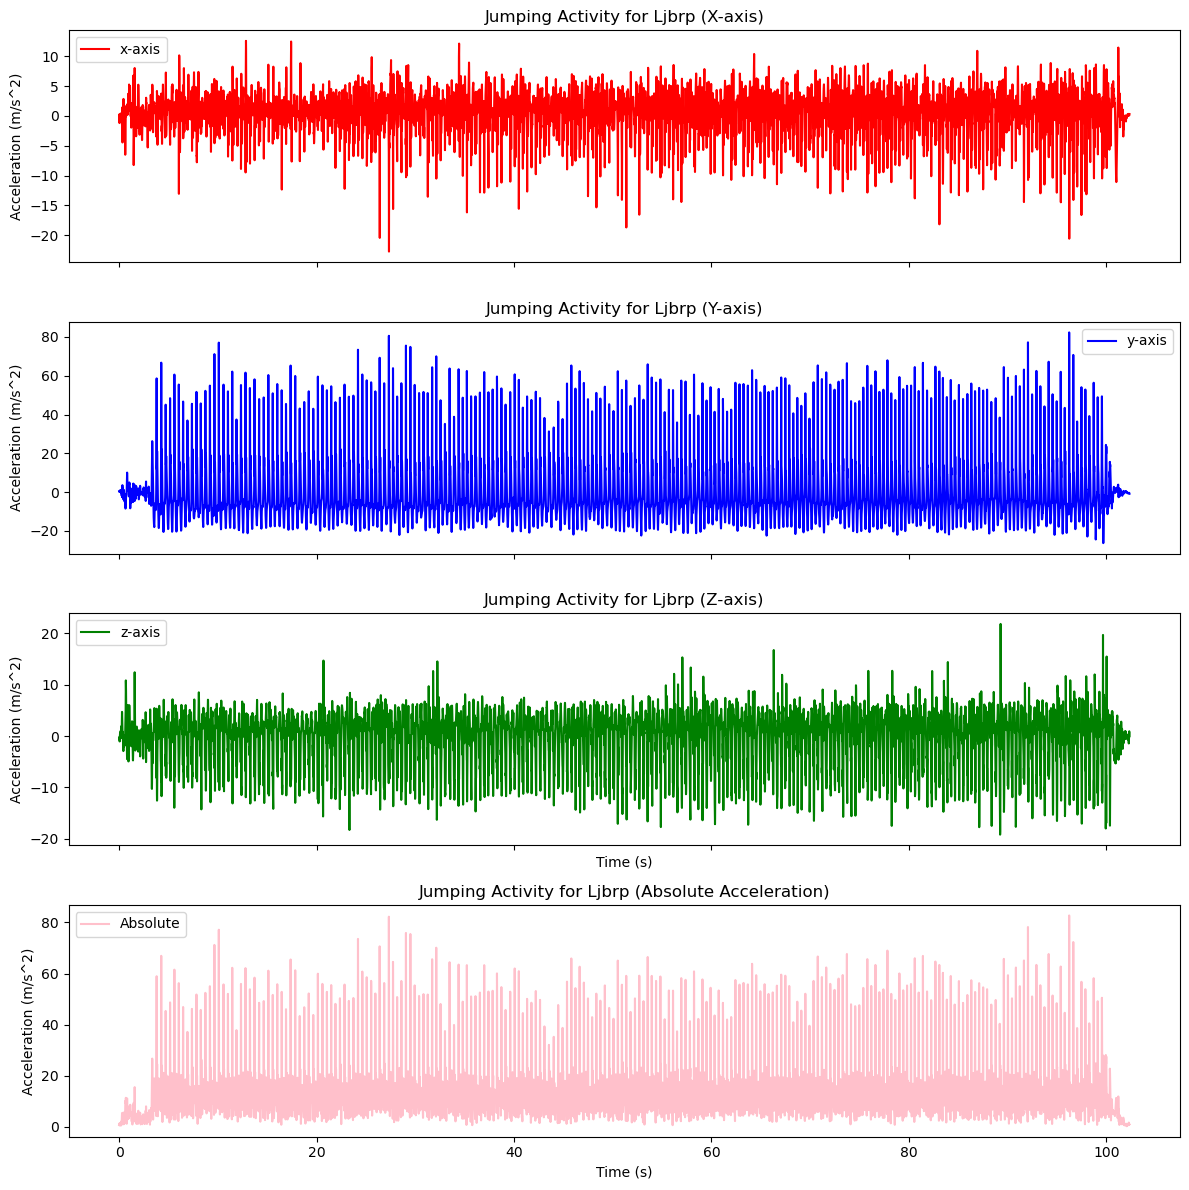

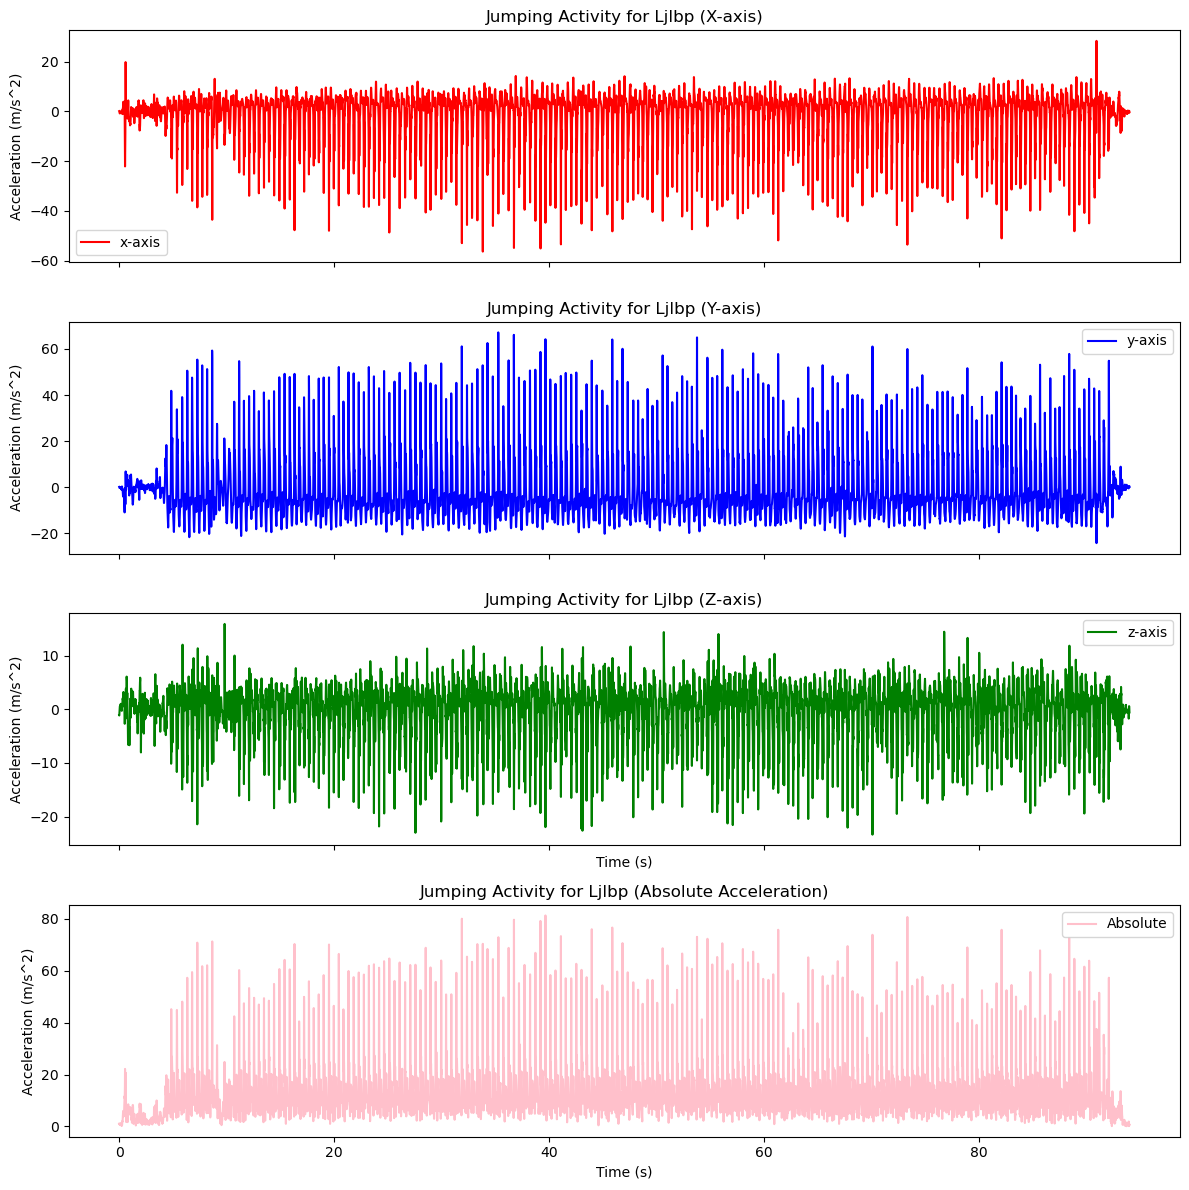

In [30]:
# Replace the file path with the actual path to your CSV file
for name in ['ajbrp','ajflp', 'kjb','kjf','ljbrp','ljlbp']:
    csv_file_path = "data/jumping/"+str(name)+"_data.csv"
    csv_data = pd.read_csv(csv_file_path)
    if name in ['ajbrp','ajflp']:
        test = 'Abdellah'
    elif name in ['kjb','kjf']:
        test = 'Kyle'
    else:
        test= 'Liam'
    # Assuming the person's name is "Ljlbp" and the activity is "jumping"
    plot_acceleration_data2(csv_data, name, "jumping")


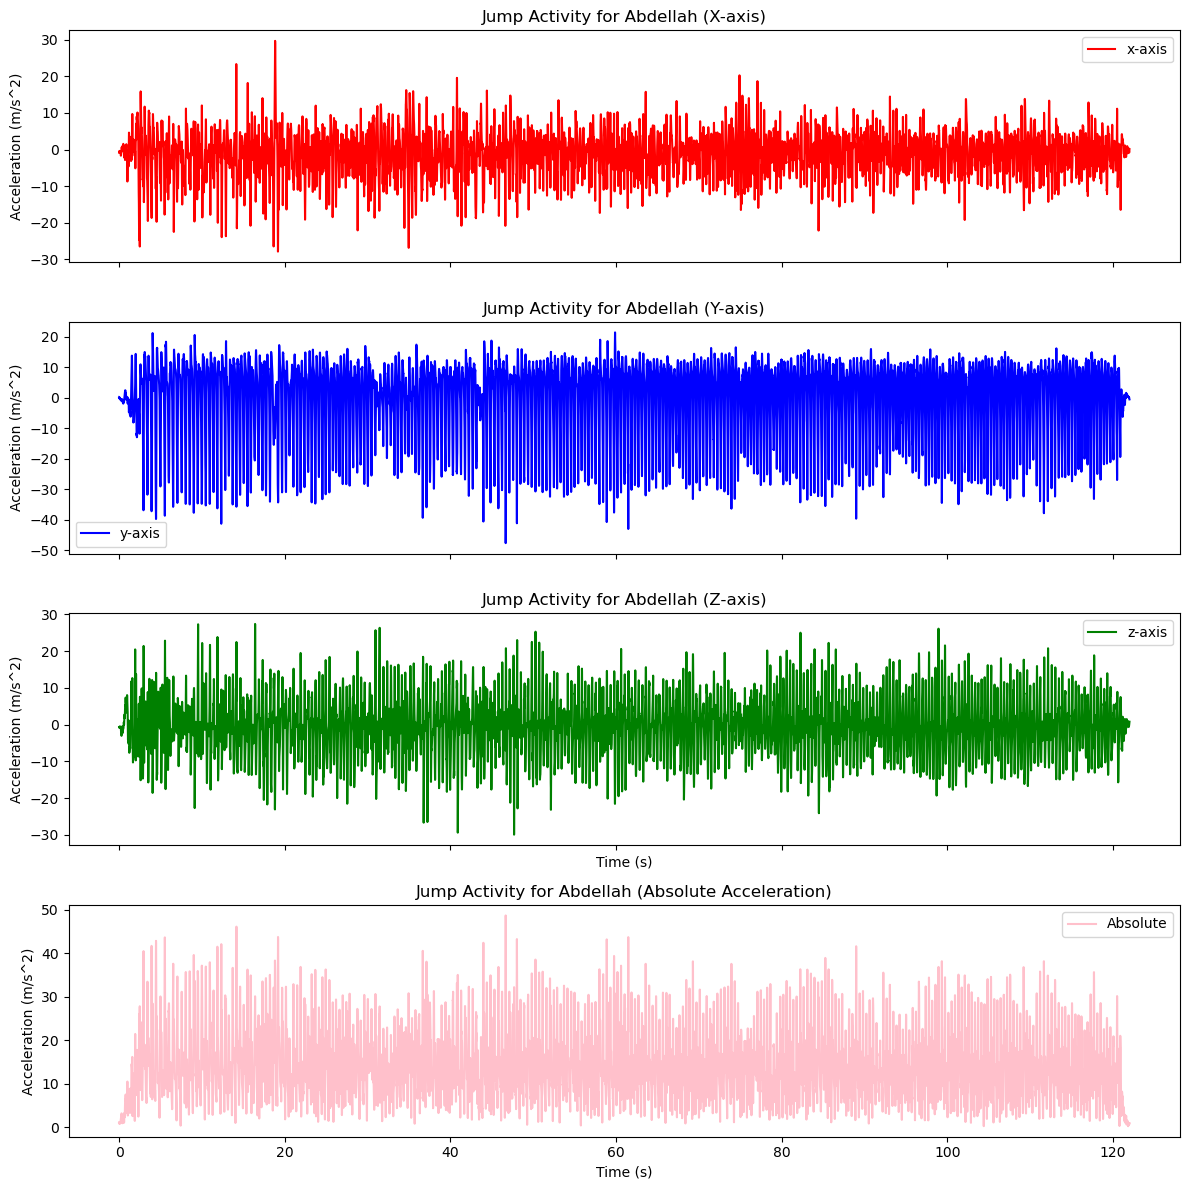

In [31]:
df = pd.read_csv("data/NewData/abdellah_jump_hand.csv")

#function to plot dataframe x-plot_acceleration_data1

plot_acceleration_data2(df, "abdellah", "jump")


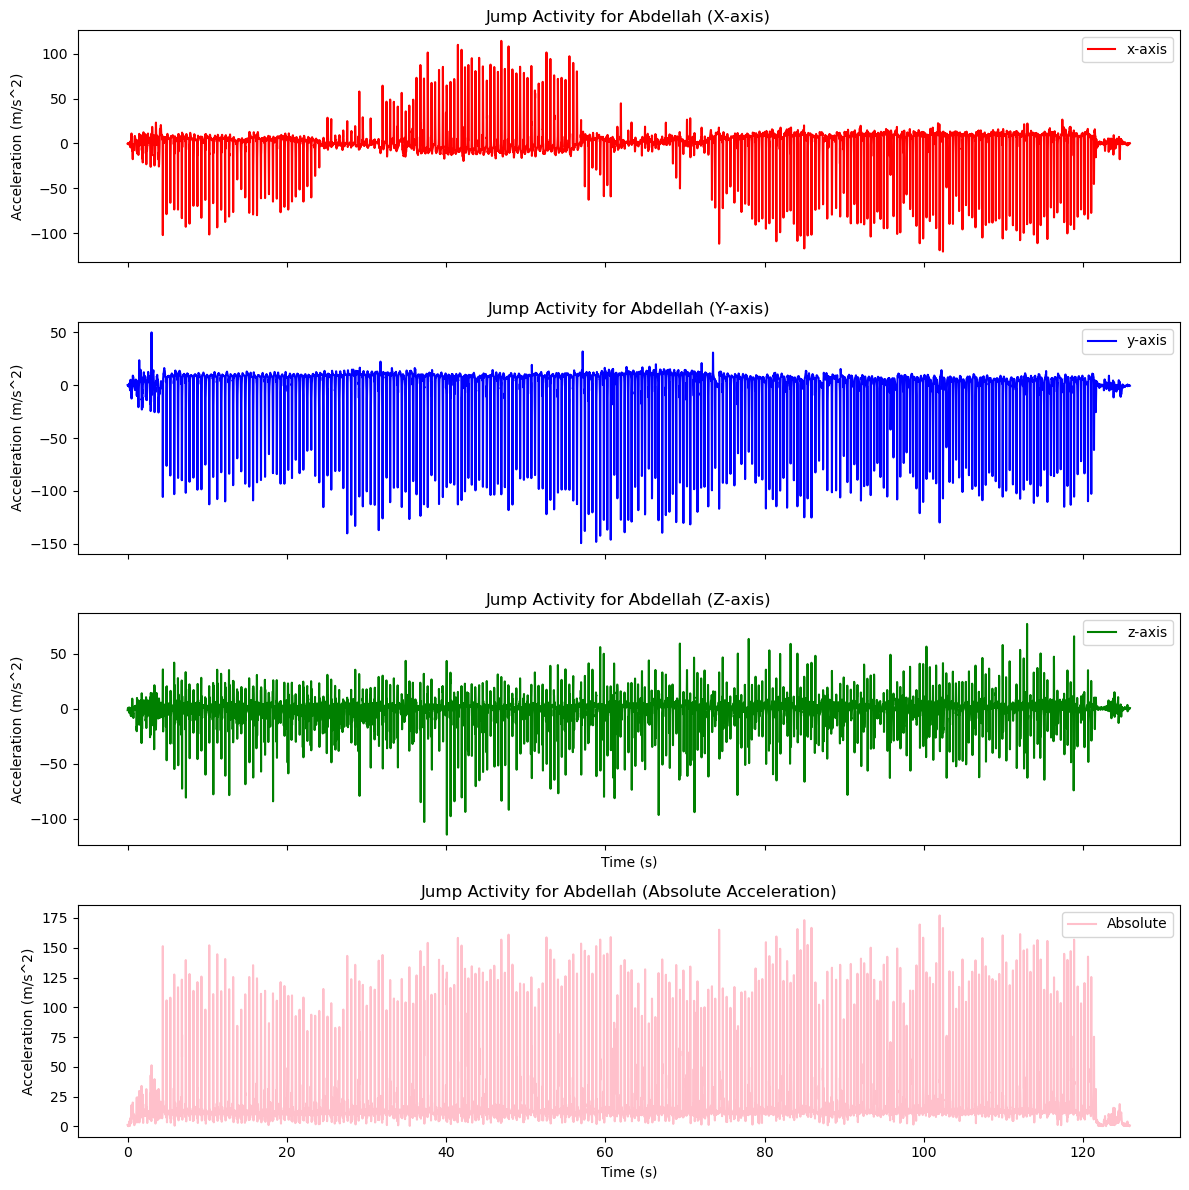

In [32]:
df = pd.read_csv("data/NewData/abdellah_jump_pocket.csv")

#function to plot dataframe x-plot_acceleration_data1

plot_acceleration_data2(df, "abdellah", "jump")


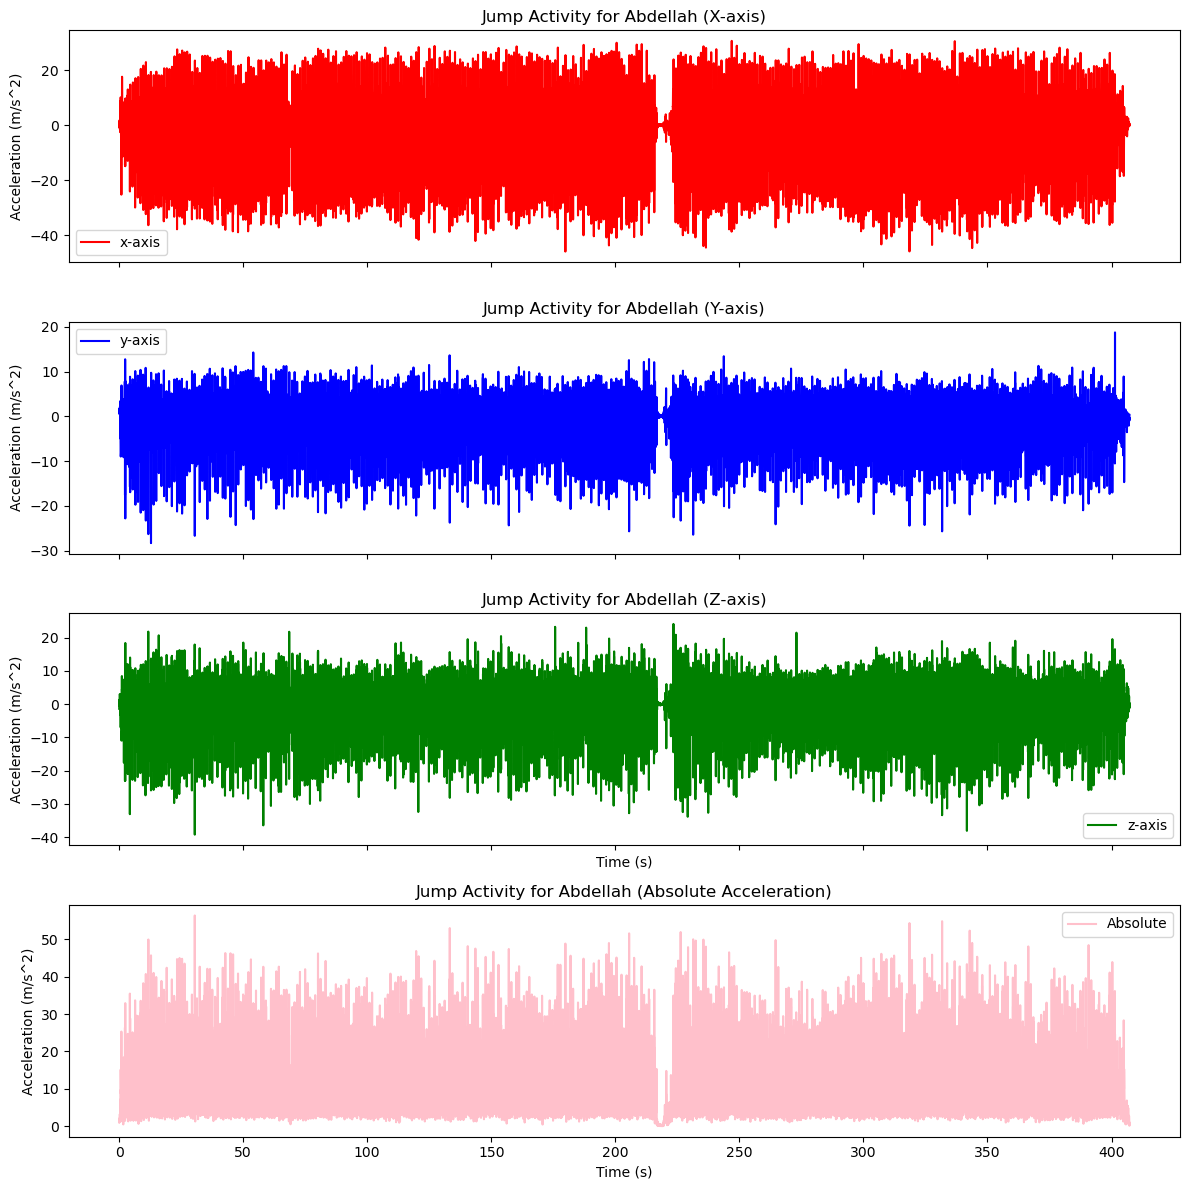

In [33]:
df = pd.read_csv("data/NewData/abdellah_walking_pocket.csv")

#function to plot dataframe x-plot_acceleration_data1

plot_acceleration_data2(df, "abdellah", "jump")


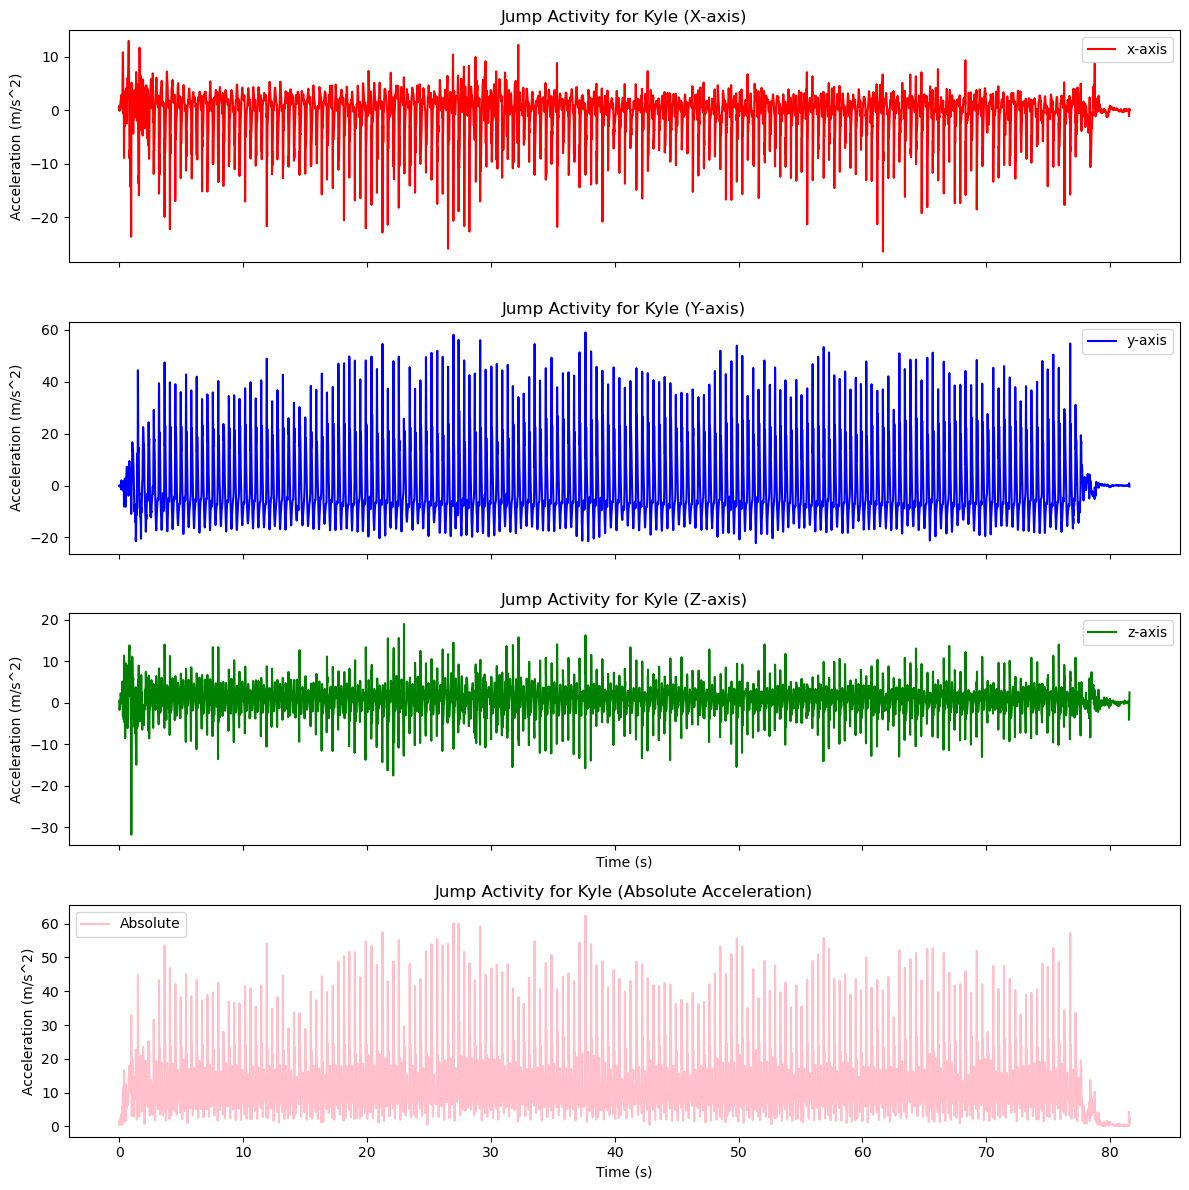

In [34]:
df = pd.read_csv("data/NewData/kyle_jump_back.csv")
plot_acceleration_data2(df, "kyle", "jump")


